In [36]:
import math
from sklearn import datasets, tree, cross_validation, ensemble

%pylab inline
pylab.rcParams['figure.figsize'] = (18, 6)

Populating the interactive namespace from numpy and matplotlib


In [37]:
# Create new dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [14]:
# Train default decision tree classifier with cross validation
c1 = tree.DecisionTreeClassifier(random_state=1)
scores = cross_validation.cross_val_score(c1, X, y, cv=10)
print "Mean score: ", scores.mean()

Mean score:  0.83086244395


In [18]:
# Train decision tree with bagging
c2 = ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(random_state=1),
                                n_estimators=100)
scores = cross_validation.cross_val_score(c2, X, y, cv=10)
print "Mean score: ", scores.mean()

Mean score:  0.922090797379


In [23]:
# Train decision tree with bagging that takes sqrt(d) features
c3 = ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(random_state=1),
                                max_features=int(math.sqrt(X.shape[1])),
                                n_estimators=100)
scores = cross_validation.cross_val_score(c3, X, y, cv=10)
print "Mean score: ", scores.mean()

Mean score:  0.932665111946


In [24]:
# Train decision tree that takes sqrt(d) features with bagging
c4 = ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(random_state=1,
                                                                           max_features=int(math.sqrt(X.shape[1]))),
                                n_estimators=100)
scores = cross_validation.cross_val_score(c4, X, y, cv=10)
print "Mean score: ", scores.mean()

Mean score:  0.949980324876


In [28]:
c5 = ensemble.RandomForestClassifier(random_state=1, n_estimators=100)
scores = cross_validation.cross_val_score(c5, X, y, cv=10)
print "Mean score: ", scores.mean()

Mean score:  0.957213001227


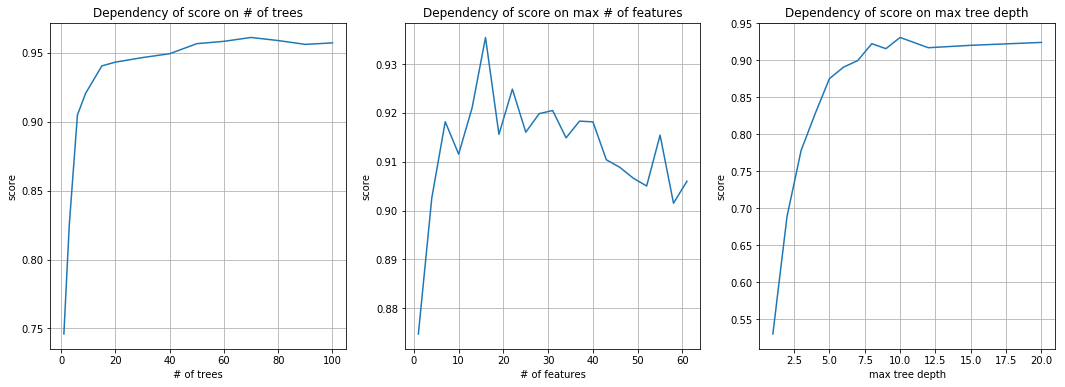

In [42]:
trees = [1, 3, 6, 9, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
tscores = []
for t in trees:
    tscores.append(cross_validation.cross_val_score(ensemble.RandomForestClassifier(random_state=1,
                                                                                   n_estimators=t),
                                                   X, y, cv=10).mean())
features = range(1, X.shape[1], 3)
fscores = []
for f in features:
    fscores.append(cross_validation.cross_val_score(ensemble.RandomForestClassifier(random_state=1,
                                                                                    max_features=f),
                                                    X, y, cv=10).mean())
    
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20]
dscores = []
for d in depths:
    dscores.append(cross_validation.cross_val_score(ensemble.RandomForestClassifier(random_state=1,
                                                                                    max_depth=d),
                                                   X, y, cv=10).mean())
    

pylab.subplot(131)
pylab.grid(True)
pylab.title("Dependency of score on # of trees")
pylab.xlabel("# of trees")
pylab.ylabel("score")
pylab.plot(trees, tscores)
pylab.subplot(132)
pylab.grid(True)
pylab.title("Dependency of score on max # of features")
pylab.xlabel("# of features")
pylab.ylabel("score")
pylab.plot(features, fscores)
pylab.subplot(133)
pylab.grid(True)
pylab.title("Dependency of score on max tree depth")
pylab.xlabel("max tree depth")
pylab.ylabel("score")
pylab.plot(depths, dscores)